In [1]:
import pandas as pd
dataset = pd.read_csv("winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
for x in range(0,12):
    if dataset.iloc[:, x].isnull().sum() > 0:
        print("boş değer var --> {}.".format(x))
    else :
        print("boş değer yok --> {}. sütun".format(x))

boş değer yok --> 0. sütun
boş değer yok --> 1. sütun
boş değer yok --> 2. sütun
boş değer yok --> 3. sütun
boş değer yok --> 4. sütun
boş değer yok --> 5. sütun
boş değer yok --> 6. sütun
boş değer yok --> 7. sütun
boş değer yok --> 8. sütun
boş değer yok --> 9. sütun
boş değer yok --> 10. sütun
boş değer yok --> 11. sütun


In [3]:
#checking for missing values
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Analysis and Visulaization

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


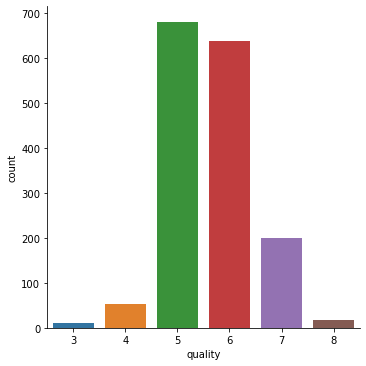

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x = 'quality', data = dataset, kind = 'count')

In [6]:
# acidity vs quality
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
feature = ['fixed acidity', 'volatile acidity', 'citric acid']
list(enumerate(feature))

[(0, 'fixed acidity'), (1, 'volatile acidity'), (2, 'citric acid')]

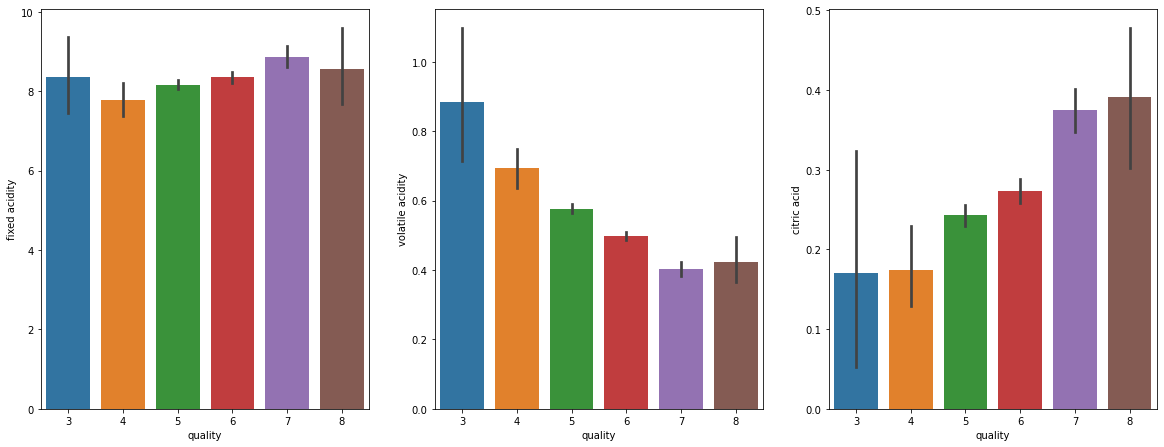

In [8]:
plt.figure(figsize=(20,25))
for i in enumerate(feature):
    plt.subplot(3,3, i[0] + 1)
    sns.barplot(x='quality', y = i[1], data=dataset)

### correlation

In [9]:
correlation = dataset.corr()

<AxesSubplot:>

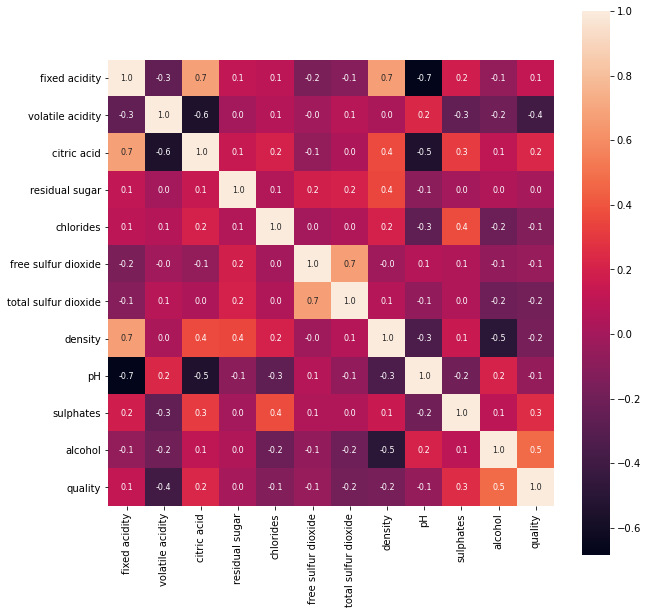

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            fmt = '.1f', 
            annot = True, 
            annot_kws = {'size' : 8}, 
            cmap = 'rocket')

In [11]:
X = dataset.drop('quality', axis = 1)
# kalite değerleri 3,4,5,6,7,8 bunları ikili kale getireceğiz ki label 0 1 mantığı olsun
y = dataset['quality'].apply(lambda _value : 1 if _value >= 7 else 0) # _value >= 7 mi True ise 1 olsun değilse 0 olsun
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.20,
                                                   random_state =2)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('accuracy score: {}'.format(accuracy))

accuracy score: 0.903125


In [13]:
rf_params = {'max_depth' : list(range(1,10)),
            'max_features' : [2,3,5,10, 15],
            'n_estimators' : [200, 500, 1000, 2000],
            'min_samples_split' : [2, 5, 10]}

In [14]:
rf_model = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV
rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv = 10,
                          n_jobs = -1) #

In [15]:
rf_cv_model.fit(X_train, y_train)

C:\Users\Client\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.86239542 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542
 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542
 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542
 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542
 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542
 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542
 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542
 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542
 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542 0.86239542
 0.86318282 0.86396407 0.86239542 0.86239542 0.86318

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [2, 3, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 500, 1000, 2000]})

In [16]:
rf_cv_model.best_params_

{'max_depth': 9,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [24]:
rf_tuned = RandomForestClassifier(max_depth=9, max_features=5, n_estimators = 2000,min_samples_split = 2, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)

In [25]:
accuracy = accuracy_score(y_pred, y_test)
print('accuracy score: {}'.format(accuracy))

accuracy score: 0.91875


In [27]:
# predictive system
_input = (8.3,0.65,0.1,2.9,0.08900000000000001,17.0,40.0,0.99803,3.29,0.55,9.5)
import numpy as np
input_array = np.asarray(_input)
input_reshape = input_array.reshape(1,-1)
pred = rf_tuned.predict(input_reshape)
if pred == 1 :
    print("Good quality")
else : 
    print("Poor quality")

Poor quality
